## Trip to Honolulu

I've decided to treat myself to a long holiday vacation in Honolulu, Hawaii! 
Before i pack for the trip i need to do some analysis on the area, so i can pack appropriately.
For this i will be using SQLAlchemy ORM queries, sqlite, Pandas, numpy Matplotlib and fivethirtyeight.


In [1]:
# load appropriate dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight') # for color scheme
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
#import date formatting tools
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
# to access our database with sqlalchemy, and write SQL queries with Python.
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# set up a connection to the database (hawaii.sqlite) to use SQLAlchemy ORM.
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect the existing database into a new model
Base = automap_base()

#reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Inspect Tables to determine the kind of data we are working with
# inspect measurement schema
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Review table head
engine.execute('SELECT * FROM  Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
#inspect station columns
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Review table head
engine.execute('SELECT * FROM  Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

The database has two tables; Measurement and Station. The Measurement table has observations on precipitation and temperature for various dates, and the Station table has a list of stations, names, their locations and elevations.

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# query to find latest date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

'2017-08-23'

In [15]:
# Calculate the date 1 year ago from the last data point in the database
last_twelve_months = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_twelve_months

datetime.datetime(2016, 8, 23, 0, 0)

In [16]:
# retrieve the last 12 months of precipitation date and score
precip_data = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= last_twelve_months).\
                    group_by(Measurement.date).all()
precip_data

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# load as a dataframe
precip_df = pd.DataFrame(precip_data, columns = ['date', 'precipitation'])

#set index
precip_df.set_index('date', inplace = True)

# Sort the dataframe by date
precip_df = precip_df.sort_values(by = 'date')
precip_df.head()

,precipitation
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


In [18]:
#precip_df.tail()

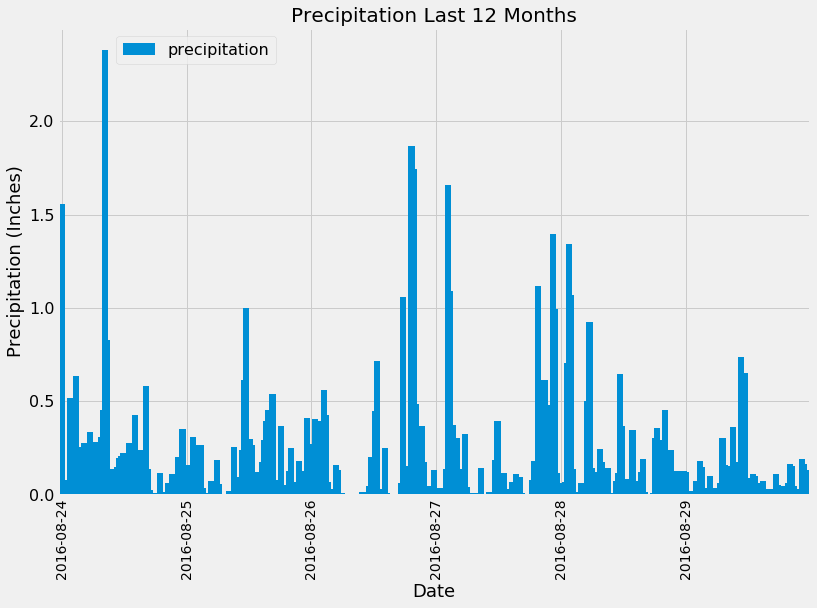

In [19]:
# Plot the precipitation for the past 12 months
ax = precip_df.plot(kind='bar', width=3, figsize=(12,8))
plt.locator_params(axis='x', nbins=6)
#ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis='y', labelsize=16)
ax.grid(True)
plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.title("Precipitation Last 12 Months", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=18)
plt.savefig("Figures/precip.png")
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


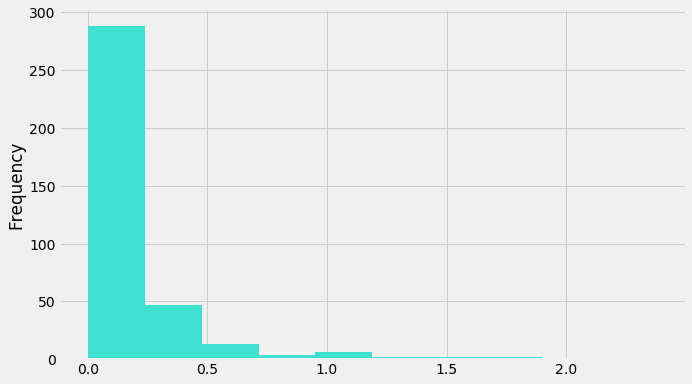

In [21]:
precip_df['precipitation'].plot.hist(grid=True,color = 'turquoise', figsize=(10, 6))
plt.show()

### Station Analysis

In [22]:
# inspect Station table details
for table_name in inspector.get_table_names():
    for column in inspector.get_columns(table_name):
        print( table_name,": ", column.get('name'), ", ", column.get('type'))

measurement :  id ,  INTEGER
measurement :  station ,  TEXT
measurement :  date ,  TEXT
measurement :  prcp ,  FLOAT
measurement :  tobs ,  FLOAT
station :  id ,  INTEGER
station :  station ,  TEXT
station :  name ,  TEXT
station :  latitude ,  FLOAT
station :  longitude ,  FLOAT
station :  elevation ,  FLOAT


In [23]:
# Design a query to show how many stations are available in this dataset?
stationsCount = session.query(Station).count()
print(f"There are: {stationsCount} stations in the dataset")

There are: 9 stations in the dataset


In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# Hint: use functions such as `func.min`, `func.max`, `func.avg`,`func.count` in your queries.
stationCounts = (session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())
stationCounts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Which is the most active station?
active_station = stationCounts[0][0] 
active_station

'USC00519281'

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),\
              func.avg(Measurement.tobs),\
              func.max(Measurement.tobs)).\
            filter(Measurement.station == active_station).all()



[(54.0, 71.66378066378067, 85.0)]

In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 
# and plot the results as a histogram

temp_observations = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == active_station).\
                filter(Measurement.date >= last_twelve_months).all()
tobs_df = pd.DataFrame(temp_observations)
tobs_df.set_index('station', inplace=True)
tobs_df.head()


,tobs
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


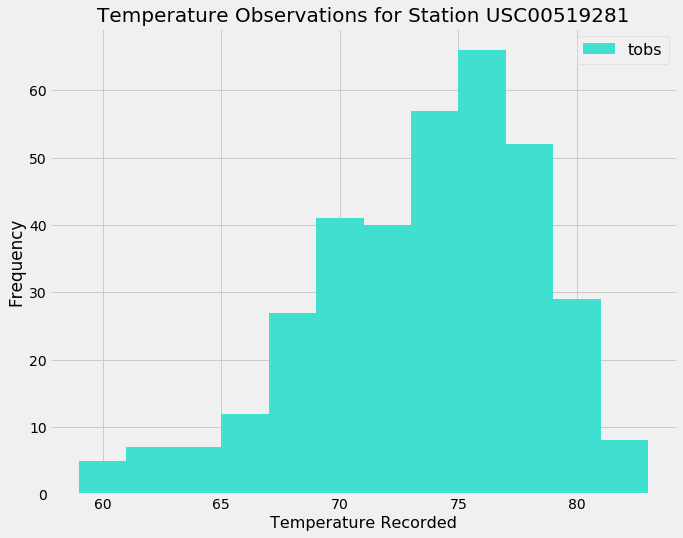

In [29]:
# Plot the results as a histogram with bins=12.
tobs_df.plot.hist(by='station', bins=12, color = 'turquoise', figsize=(10,8))
plt.title("Temperature Observations for Station " + active_station, fontsize=20)
plt.xlabel("Temperature Recorded", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
ax.grid(True)
plt.savefig("Figures/StationTemps.png")
plt.show()

## Bonus Challenge Assignment

### Temperature Analysis II

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
mytrip_temps = calc_temps('2017-03-01','2017-04-14')
mytrip_temps

[(62.0, 73.05734767025089, 82.0)]

In [32]:
mytrip_df = pd.DataFrame(mytrip_temps, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
mytrip_df.head()

,Min Temp,Avg Temp,Max Temp
0,62.0,73.057348,82.0


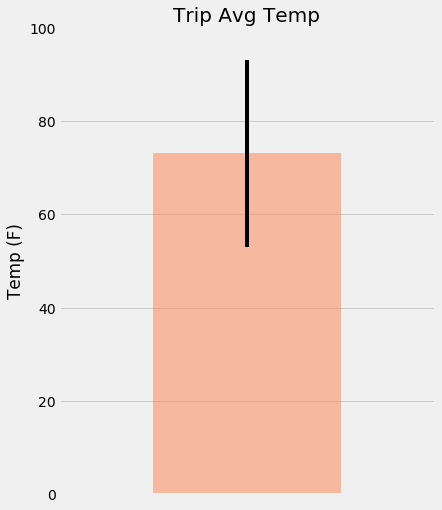

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

mytrip_df = pd.DataFrame(mytrip_temps, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = mytrip_df['Avg Temp']
min_max_temp = mytrip_df.iloc[0]['Max Temp'] - mytrip_df.iloc[0]['Min Temp']

avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='coral')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.ylim(0,100)
plt.xticks([])
plt.grid(True)
plt.savefig("Figures/Mytrip.png")
plt.show()


### Daily Rainfall Average

In [34]:
#inspect station columns
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [35]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2017-03-01'
end_date = '2017-03-15'

yearly_rainfall = session.query(Station.station,
                  func.avg(Measurement.prcp),
                  Station.name,
                  Station.latitude,                                    
                  Station.longitude,
                  Station.elevation)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= start_date)\
.filter(Measurement.date <= end_date)\
.group_by(Station.station)\
.order_by(func.avg(Measurement.prcp).desc()).all()

for row in yearly_rainfall:
    rain="{0:.2f}".format(row[1])
    print (f"Station:  {row[0]}\n    Rainfall(in.):  {rain}  \n    Name:  {row[2]}\n    Latitude:  {row[3]}  \
    Longitude:  {row[4]}  Elevation:  {row[5]}")
    print()


Station:  USC00517948
    Rainfall(in.):  0.43  
    Name:  PEARL CITY, HI US
    Latitude:  21.3934      Longitude:  -157.9751  Elevation:  11.9

Station:  USC00513117
    Rainfall(in.):  0.38  
    Name:  KANEOHE 838.1, HI US
    Latitude:  21.4234      Longitude:  -157.8015  Elevation:  14.6

Station:  USC00519281
    Rainfall(in.):  0.36  
    Name:  WAIHEE 837.5, HI US
    Latitude:  21.45167      Longitude:  -157.84888999999998  Elevation:  32.9

Station:  USC00516128
    Rainfall(in.):  0.27  
    Name:  MANOA LYON ARBO 785.2, HI US
    Latitude:  21.3331      Longitude:  -157.8025  Elevation:  152.4

Station:  USC00514830
    Rainfall(in.):  0.25  
    Name:  KUALOA RANCH HEADQUARTERS 886.9, HI US
    Latitude:  21.5213      Longitude:  -157.8374  Elevation:  7.0

Station:  USC00519523
    Rainfall(in.):  0.23  
    Name:  WAIMANALO EXPERIMENTAL FARM, HI US
    Latitude:  21.33556      Longitude:  -157.71139  Elevation:  19.5

Station:  USC00519397
    Rainfall(in.):  0.18  
  

In [36]:
# load into a pandas dataframe
yearly_rainfall_df = pd.DataFrame(yearly_rainfall, 
                columns = ['Station','Rainfall(in.)', 'Name', 'Latitude', 'Longitude','Elevation'])

yearly_rainfall_df

,Station,Rainfall(in.),Name,Latitude,Longitude,Elevation
0,USC00517948,0.434286,"PEARL CITY, HI US",21.39340,-157.97510,11.9
1,USC00513117,0.384000,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00519281,0.364000,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
3,USC00516128,0.269231,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
4,USC00514830,0.250000,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,USC00519523,0.232000,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519397,0.182667,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0


### Daily Average Temparatures

In [37]:
# Create a query that will calculate the daily normals(average temparatures)
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
# Set the start and end date of my trip
# calculate the daily normals for your trip

start_date = '2017-03-01'
end_date = '2017-03-15'

mytrip_dates=session.query(Measurement.date).\
filter(Measurement.date >= start_date).\
filter(Measurement.date <= end_date).group_by(Measurement.date).all()
mytrip_dates

[('2017-03-01'),
 ('2017-03-02'),
 ('2017-03-03'),
 ('2017-03-04'),
 ('2017-03-05'),
 ('2017-03-06'),
 ('2017-03-07'),
 ('2017-03-08'),
 ('2017-03-09'),
 ('2017-03-10'),
 ('2017-03-11'),
 ('2017-03-12'),
 ('2017-03-13'),
 ('2017-03-14'),
 ('2017-03-15')]

In [39]:
# Strip off the year and save a list of %m-%d strings
trip_dates = pd.date_range(start_date, end_date).strftime('%m-%d')

trip_dates

Index(['03-01', '03-02', '03-03', '03-04', '03-05', '03-06', '03-07', '03-08',
       '03-09', '03-10', '03-11', '03-12', '03-13', '03-14', '03-15'],
      dtype='object')

In [40]:
# Loop through the list of %m-%d strings and calculate the normals for each date
# and append the results to the list

normals_list = []
for trip_date in trip_dates:
    normals_list.append(*daily_normals(trip_date))
normals_list

[(64.0, 70.0327868852459, 76.0),
 (61.0, 70.36666666666666, 78.0),
 (60.0, 70.06896551724138, 78.0),
 (57.0, 69.27272727272727, 77.0),
 (60.0, 67.89090909090909, 76.0),
 (60.0, 69.20338983050847, 76.0),
 (60.0, 69.17241379310344, 78.0),
 (59.0, 68.72413793103448, 78.0),
 (57.0, 68.56140350877193, 75.0),
 (57.0, 69.12280701754386, 75.0),
 (60.0, 69.89285714285714, 82.0),
 (62.0, 69.88888888888889, 80.0),
 (56.0, 69.29629629629629, 77.0),
 (62.0, 70.32758620689656, 77.0),
 (58.0, 68.54716981132076, 76.0)]

In [41]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

normals_df = pd.DataFrame(normals_list, columns = ['Min Temp', 'Ave Temp', 'Max Temp'])

# set the trip dates the index
normals_df['Date'] = trip_dates
normals_df = normals_df.set_index('Date')
normals_df

,Min Temp,Ave Temp,Max Temp
Date,,,
03-01,64.0,70.032787,76.0
03-02,61.0,70.366667,78.0
03-03,60.0,70.068966,78.0
03-04,57.0,69.272727,77.0
03-05,60.0,67.890909,76.0
03-06,60.0,69.203390,76.0
03-07,60.0,69.172414,78.0
03-08,59.0,68.724138,78.0
03-09,57.0,68.561404,75.0


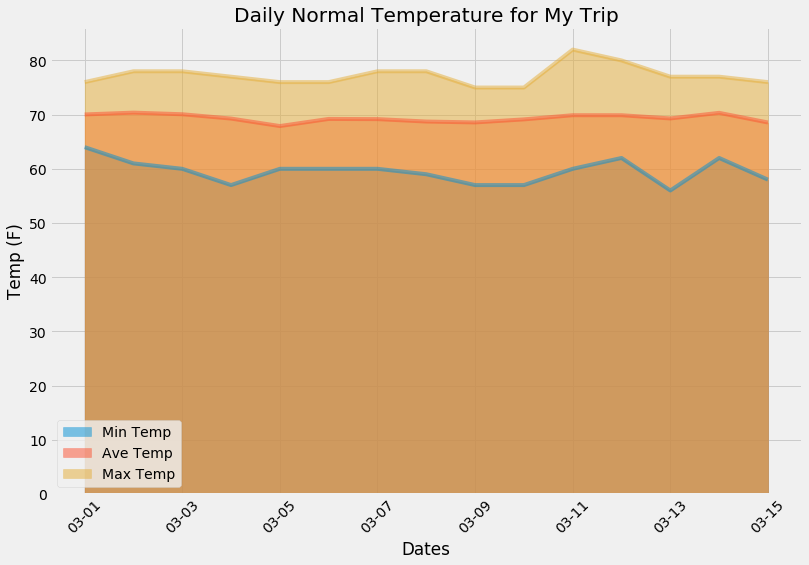

In [42]:
# Plot the daily normals as an area plot with `stacked=False`
'''Area Plot'''

# set an area plot for the predicted temps
normals_df.plot(kind='area', figsize=(12, 8), stacked=False, x_compat=True, 
                title='Daily Normal Temperature for My Trip', rot=45)

# set the labels
plt.xlabel('Dates')
plt.ylabel('Temp (F)')

plt.savefig("Figures/normals.png")
plt.show()